# GSEA analysis on leukemia dataset

In [1]:
%load_ext autoreload
%autoreload 2

In [27]:
from gsea import *
import numpy as np
%pylab

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


In [31]:
%matplotlib inline

## Load data

In [157]:
genes, D, C = read_expression_file("data/leukemia.txt")
gene_sets, gene_set_names = read_genesets_file("data/pathways.txt", genes)
gene_set_hash = {}
for i in range(len(gene_sets)):
    gene_set_hash[gene_set_names[i][0]] = {'indexes':gene_sets[i],'desc':gene_set_names[i][1]}

In [111]:
# verify that the dimensions make sense
len(genes),D.shape,len(C)

(2672, (2672, 72), 72)

## Enrichment score calculations
We graphically present the calculation of ES.

In [173]:
L,r = rank_genes(D,C)

See if the first genes in *L* are indeed correlated with *C*

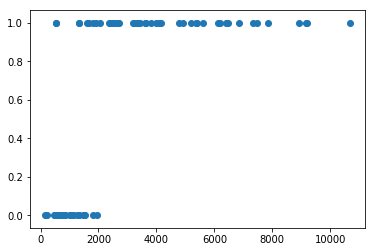

In [174]:
scatter(D[L[1],:],C)

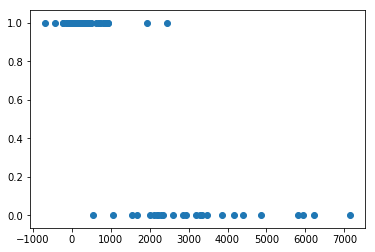

In [175]:
scatter(D[L[-1],:],C)

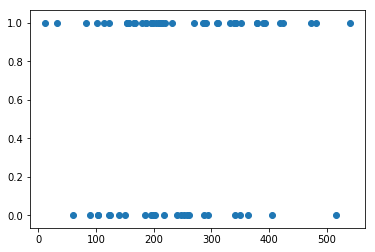

In [176]:
scatter(D[L[1000],:],C)

## Graphical ilustration of ES calculations

In [113]:
p_exp = 1
def plot_es_calculations(name, L, r):
    S = gene_set_hash[name]['indexes']
    N = len(L)
    S_mask = np.zeros(N)
    S_mask[S] = 1
    # reorder gene set mask
    S_mask = S_mask[L]
    N_R = sum(abs(r*S_mask)**p_exp)
    P_hit = np.cumsum(abs(r*S_mask)**p_exp)/N_R if N_R!=0 else np.zeros_like(S_mask)
    N_H = len(S)
    P_mis = np.cumsum((1-S_mask))/(N-N_H) if N!=N_H else np.zeros_like(S_mask)
    idx = np.argmax(abs(P_hit - P_mis))
    print("ES =", P_hit[idx]-P_mis[idx])
    f, axarr = plt.subplots(3, sharex=True)
    axarr[0].plot(S_mask)
    axarr[0].set_title('gene set %s' % name)
    axarr[1].plot(r)
    axarr[1].set_title('correlation with phenotype')
    axarr[2].plot(P_hit-P_mis)
    axarr[2].set_title('random walk')

ES = 0.214604376897


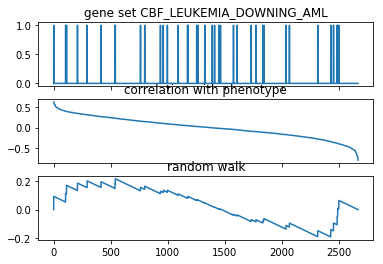

In [114]:
L,r = rank_genes(D,C)
plot_es_calculations('CBF_LEUKEMIA_DOWNING_AML', L, r)

## Random phenotype labels
Now let's assign phenotype labels randomly. Is the ES much different?

[0 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 0 0
 0 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1]
ES = -0.344727013021


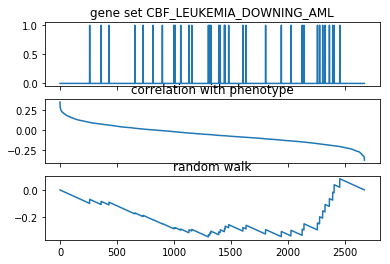

In [65]:
N, k = D.shape
pi = np.array([np.random.randint(0,2) for i in range(k)])
L, r = rank_genes(D,pi)
print(pi)
plot_es_calculations('CBF_LEUKEMIA_DOWNING_AML', L, r)

## GSEA analysis

In [71]:
%time order, NES, p_values = gsea(D, C, gene_sets)

CPU times: user 8min 3s, sys: 132 ms, total: 8min 3s
Wall time: 8min 3s


In [110]:
print("geneset\tNES\tp-value\tnumber of genes in geneset")
for i in range(len(order)):
    print("%s\t%.3f\t%.7f\t%d" % (gene_set_names[order[i]][0], NES[i], p_values[i], len(gene_sets[order[i]])))

geneset	NES	p-value	number of genes in geneset
MAP00532_Chondroitin_Heparan_sulfate_biosynthesis	-2.365	0.0000000	0
MAP_kinase_kinase_activity	-2.273	0.0225564	4
cell_cycle_checkpointII	2.195	0.0173160	7
mitrPathway	2.116	0.0210843	3
MAP03070_Type_III_secretion_system	-2.074	0.0179641	10
mspPathway	-2.059	0.0066445	4
pepiPathway	-2.054	0.0111732	5
anthraxPathway	-2.045	0.0238095	2
aifPathway	2.041	0.0405405	2
pentosePathway	-2.040	0.0139860	3
Pentose_Phosphate_Pathway	-2.030	0.0361991	5
MAP00193_ATP_synthesis	-2.004	0.0408163	10
slrp2Pathway	-1.945	0.0197183	3
ROS	-1.911	0.0359281	6
ST_Interleukin_13_Pathway	-1.888	0.0441176	4
neutrophilPathway	-1.876	0.0203160	8
alternativePathway	-1.875	0.0441176	8
MAP00533_Keratan_sulfate_biosynthesis	1.863	0.0263158	2
ST_Dictyostelium_discoideum_cAMP_Receptor_G_Protein_Independent_Pathways	1.862	0.0294118	3
reckPathway	-1.841	0.0387597	6
il10Pathway	-1.837	0.0380117	13
ST_IL_13_PATHWAY	-1.826	0.0620690	4
mrpPathway	-1.822	0.0517928	3
tsp1Pathway	-1

ES = -0.694416930286


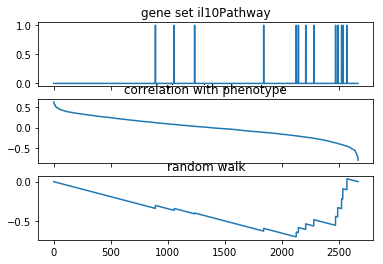

In [127]:
name = 'il10Pathway'
L,r = rank_genes(D,C)
plot_es_calculations(name, L, r)

In [128]:
n = 1000
S =  gene_set_hash[name]['indexes']
L, r = rank_genes(D,C)
ES = enrichment_score(L,r,S)
ES_pi = np.zeros(n)
for i in range(n):
    pi = np.array([np.random.randint(0,2) for i in range(k)])
    L, r = rank_genes(D,pi)
    ES_pi[i] = enrichment_score(L,r,S)

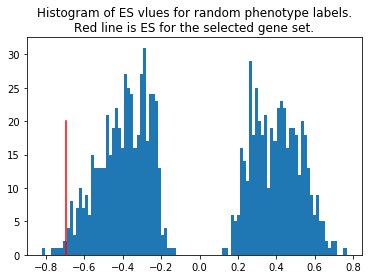

In [133]:
hist(ES_pi,bins=100)
plot([ES,ES],[0,20],'r-',label="ES(S)")
title("Histogram of ES vlues for random phenotype labels.\nRed line is ES for the selected gene set.")
